In [45]:
import pandas as pd

refund = ["Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No"]
marital_status = ["Single", "Married", "Single", "Married", "Divorced", "Married", "Divorced", "Single", "Married", "Single"]
taxable_income = [125, 100, 70, 120, 95, 60, 220, 85, 75, 90]
cheat = ["No", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "Yes"]

data = {"Refund": refund, "Marital Status": marital_status, "Taxable Income": taxable_income, "Cheat": cheat}
df = pd.DataFrame(data)
df

,Refund,Marital Status,Taxable Income,Cheat
0,Yes,Single,125,No
1,No,Married,100,No
2,No,Single,70,No
3,Yes,Married,120,No
4,No,Divorced,95,Yes
5,No,Married,60,No
6,Yes,Divorced,220,No
7,No,Single,85,Yes
8,No,Married,75,No
9,No,Single,90,Yes


In [46]:
df["Taxable Income"] = pd.cut(df["Taxable Income"] , bins=3 , labels=[0,1,2])
print(df)

  Refund Marital Status Taxable Income Cheat
0    Yes         Single              1    No
1     No        Married              0    No
2     No         Single              0    No
3    Yes        Married              1    No
4     No       Divorced              0   Yes
5     No        Married              0    No
6    Yes       Divorced              2    No
7     No         Single              0   Yes
8     No        Married              0    No
9     No         Single              0   Yes


In [47]:
df["Refund"] = df["Refund"].apply(lambda x : 1 if x=="Yes" else 0)
df["Cheat"] = df["Cheat"].apply(lambda x : 1 if x=="Yes" else 0)

#One-Hot Encoding
df = pd.get_dummies(df , columns=["Marital Status"])

print(df)



   Refund Taxable Income  Cheat  Marital Status_Divorced  \
0       1              1      0                    False   
1       0              0      0                    False   
2       0              0      0                    False   
3       1              1      0                    False   
4       0              0      1                     True   
5       0              0      0                    False   
6       1              2      0                     True   
7       0              0      1                    False   
8       0              0      0                    False   
9       0              0      1                    False   

   Marital Status_Married  Marital Status_Single  
0                   False                   True  
1                    True                  False  
2                   False                   True  
3                    True                  False  
4                   False                  False  
5                    True        

In [48]:
df


,Refund,Taxable Income,Cheat,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,1,1,0,False,False,True
1,0,0,0,False,True,False
2,0,0,0,False,False,True
3,1,1,0,False,True,False
4,0,0,1,True,False,False
5,0,0,0,False,True,False
6,1,2,0,True,False,False
7,0,0,1,False,False,True
8,0,0,0,False,True,False
9,0,0,1,False,False,True


In [51]:
change_status = lambda a : 1 if a ==True else 0
df[["Marital Status_Divorced", "Marital Status_Married", "Marital Status_Single"]] = df[["Marital Status_Divorced", "Marital Status_Married", "Marital Status_Single"]].apply(lambda x: x.map(change_status))


In [57]:
df

,Refund,Cheat,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Taxable Income_0,Taxable Income_1,Taxable Income_2
0,1,0,0,0,1,False,True,False
1,0,0,0,1,0,True,False,False
2,0,0,0,0,1,True,False,False
3,1,0,0,1,0,False,True,False
4,0,1,1,0,0,True,False,False
5,0,0,0,1,0,True,False,False
6,1,0,1,0,0,False,False,True
7,0,1,0,0,1,True,False,False
8,0,0,0,1,0,True,False,False
9,0,1,0,0,1,True,False,False


In [53]:
df.dtypes

Refund                        int64
Taxable Income             category
Cheat                         int64
Marital Status_Divorced       int64
Marital Status_Married        int64
Marital Status_Single         int64
dtype: object

In [54]:
df = pd.get_dummies(df , columns=["Taxable Income"])

In [58]:
change_status = lambda a : 1 if a ==True else 0
df[["Taxable Income_0", "Taxable Income_1", "Taxable Income_2"]] = df[["Taxable Income_0", "Taxable Income_1", "Taxable Income_2"]].apply(lambda x: x.map(change_status))

In [61]:
df

,Refund,Cheat,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Taxable Income_0,Taxable Income_1,Taxable Income_2
0,1,0,0,0,1,0,1,0
1,0,0,0,1,0,1,0,0
2,0,0,0,0,1,1,0,0
3,1,0,0,1,0,0,1,0
4,0,1,1,0,0,1,0,0
5,0,0,0,1,0,1,0,0
6,1,0,1,0,0,0,0,1
7,0,1,0,0,1,1,0,0
8,0,0,0,1,0,1,0,0
9,0,1,0,0,1,1,0,0


In [65]:
col_names = df.columns.tolist()
col_names


['Refund',
 'Cheat',
 'Marital Status_Divorced',
 'Marital Status_Married',
 'Marital Status_Single',
 'Taxable Income_0',
 'Taxable Income_1',
 'Taxable Income_2']

In [66]:
miktar = df[col_names][df[col_names]>0].sum()

In [67]:
miktar

Refund                     3.0
Cheat                      3.0
Marital Status_Divorced    2.0
Marital Status_Married     4.0
Marital Status_Single      4.0
Taxable Income_0           7.0
Taxable Income_1           2.0
Taxable Income_2           1.0
dtype: float64

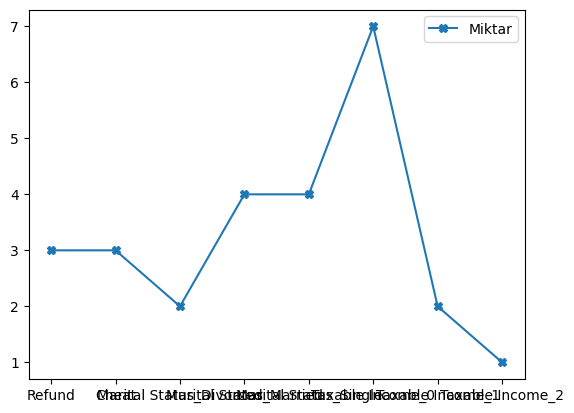

In [69]:
import matplotlib.pyplot as plt
plt.plot(miktar , label ="Miktar", marker = "X")
plt.legend()

In [70]:
from mlxtend.frequent_patterns import apriori , association_rules

freq = apriori(df, min_support = 0.2 , use_colnames = True , verbose = 1)

freq

Processing 15 combinations | Sampling itemset size 3


,support,itemsets
0,0.3,(Refund)
1,0.3,(Cheat)
2,0.2,(Marital Status_Divorced)
3,0.4,(Marital Status_Married)
4,0.4,(Marital Status_Single)
5,0.7,(Taxable Income_0)
6,0.2,(Taxable Income_1)
7,0.2,"(Taxable Income_1, Refund)"
8,0.2,"(Cheat, Marital Status_Single)"
9,0.3,"(Cheat, Taxable Income_0)"


<Axes: >

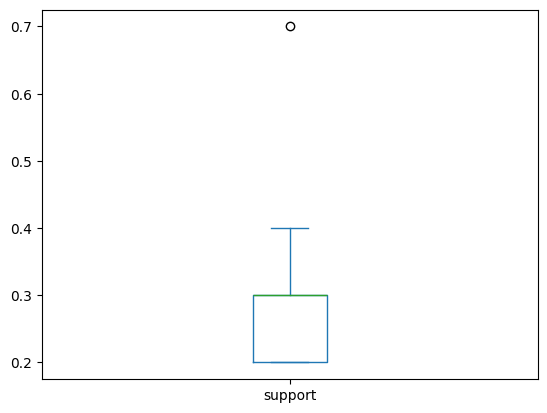

In [71]:
freq["support"].plot.box()

In [72]:
solve = association_rules(freq, metric = "confidence", min_threshold = 0.6)
solve

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Taxable Income_1),(Refund),0.2,0.3,0.2,1.000000,3.333333,0.14,inf,0.875000
1,(Refund),(Taxable Income_1),0.3,0.2,0.2,0.666667,3.333333,0.14,2.4,1.000000
2,(Cheat),(Marital Status_Single),0.3,0.4,0.2,0.666667,1.666667,0.08,1.8,0.571429
3,(Cheat),(Taxable Income_0),0.3,0.7,0.3,1.000000,1.428571,0.09,inf,0.428571
4,(Marital Status_Married),(Taxable Income_0),0.4,0.7,0.3,0.750000,1.071429,0.02,1.2,0.111111
5,(Marital Status_Single),(Taxable Income_0),0.4,0.7,0.3,0.750000,1.071429,0.02,1.2,0.111111
6,"(Cheat, Taxable Income_0)",(Marital Status_Single),0.3,0.4,0.2,0.666667,1.666667,0.08,1.8,0.571429
7,"(Cheat, Marital Status_Single)",(Taxable Income_0),0.2,0.7,0.2,1.000000,1.428571,0.06,inf,0.375000
8,"(Marital Status_Single, Taxable Income_0)",(Cheat),0.3,0.3,0.2,0.666667,2.222222,0.11,2.1,0.785714
9,(Cheat),"(Marital Status_Single, Taxable Income_0)",0.3,0.3,0.2,0.666667,2.222222,0.11,2.1,0.785714


In [73]:
solve[solve["confidence"]>0.8]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Taxable Income_1),(Refund),0.2,0.3,0.2,1.0,3.333333,0.14,inf,0.875000
3,(Cheat),(Taxable Income_0),0.3,0.7,0.3,1.0,1.428571,0.09,inf,0.428571
7,"(Cheat, Marital Status_Single)",(Taxable Income_0),0.2,0.7,0.2,1.0,1.428571,0.06,inf,0.375000


Tablo başlıklarını Apriori algoritması bağlamında açıklayalım:

1. **Antecedents (Öncüller):** Bir kurallı kuralın ön koşullarıdır. Yani, bir kuralın sol tarafındaki (ifadesindeki) öğelerdir. Örneğin, "ürün A ve ürün B satın alınırsa" şeklindeki bir kuralda, "ürün A" ve "ürün B" antecedents'tır.

2. **Consequents (Sonuçlar):** Bir kurallı kuralın sonuçlarıdır. Yani, bir kuralın sağ tarafındaki (sonucundaki) öğelerdir. Örneğin, yine "ürün A ve ürün B satın alınırsa" şeklindeki bir kuralda, "ürün C" consequent'tır.

3. **Antecedent Support (Öncül Destek):** Bir kuralın öncülünün (antecedent) veri kümesinde ne sıklıkta görüldüğünü ifade eder. Yani, belirli bir öncülün veri kümesindeki sıklığını gösterir.

4. **Consequent Support (Sonuç Destek):** Bir kuralın sonucunun (consequent) veri kümesinde ne sıklıkta görüldüğünü ifade eder. Yani, belirli bir sonucun veri kümesindeki sıklığını gösterir.

5. **Support (Destek):** Bir kuralın veri kümesinde görülme sıklığını ifade eder. Yani, bir kuralın hem öncüllerinin hem de sonuçlarının birlikte görülme sıklığını ölçer.

6. **Confidence (Güven):** Bir kuralın ne kadar güvenilir olduğunu ifade eder. Yani, bir kuralın öncüllerinin veri kümesinde görüldüğünde sonuçların da ne kadar sıklıkta gerçekleştiğini ölçer.

7. **Lift:** Bir kuralın ne kadar istatistiksel olarak anlamlı olduğunu ifade eder. Lift, bir kuralın destek değerini beklenen duruma göre ne kadar daha fazla veya daha az gösterdiğini ölçer. Lift değeri 1'den büyükse, kuralın beklenenden daha sık gerçekleştiği anlamına gelir.

8. **Leverage (Kaldıraç):** Bir kuralın gerçekleşme sıklığının, rastgele olarak oluşmasının gerçekleşme sıklığından ne kadar farklı olduğunu ifade eder. Pozitif bir kaldıraç değeri, bir kuralın gözlemlenenden daha sık gerçekleştiğini gösterir.

9. **Conviction (İnanç):** Bir kuralın ne kadar güçlü olduğunu ifade eder. Conviction değeri, bir kuralın doğru olduğuna ilişkin inancın ne kadar arttığını ölçer.